 ### Train a simple MLP on the MNIST dataset
 ### Goals
  1. precision greater than 98% 
  2. Finding the optimal learning rate by growing the learning rate exponentially (plotting the loss, and finding the point where the loss shoots up)

In [61]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [62]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [63]:
X_train_full.shape

(60000, 28, 28)

In [64]:
X_train_full.dtype

dtype('uint8')

In [65]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

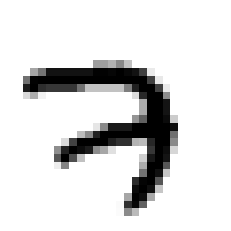

In [66]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [67]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [68]:
X_train.shape

(55000, 28, 28)

In [69]:
X_valid.shape

(5000, 28, 28)

In [70]:
X_test.shape

(10000, 28, 28)

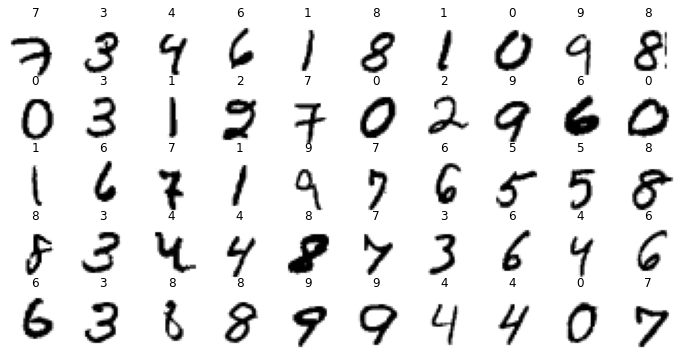

In [71]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary')
        plt.axis('off')
        plt.title(y_train[index])
plt.show()
        

In [27]:
# First try to train the model and calculate the accuracy

In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.8046 - accuracy: 0.5294 - val_loss: 1.2379 - val_accuracy: 0.7800
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9248 - accuracy: 0.8169 - val_loss: 0.6932 - val_accuracy: 0.8482
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6128 - accuracy: 0.8555 - val_loss: 0.5203 - val_accuracy: 0.8720
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4978 - accuracy: 0.8726 - val_loss: 0.4417 - val_accuracy: 0.8894
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4391 - accuracy: 0.8833 - val_loss: 0.3974 - val_accuracy: 0.8956
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4031 - accuracy: 0.8905 - val_loss: 0.3683 - val_accuracy: 0.9016
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3779 - accuracy: 0.8951 - val_loss: 0.3468 - val_accuracy:

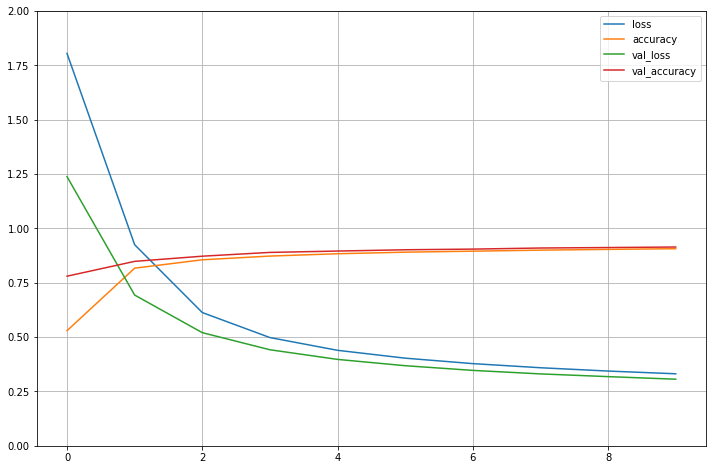

In [32]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [33]:
# Increase learning rate exponentially and find the optimal value

In [34]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
keras_backend = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_train_batch_end(self, bathc, logs):
        self.rates.append(keras_backend.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
#         print("\nLOSS IS: ", self.losses)
        keras_backend.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [37]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])
exp_lr = ExponentialLearningRate(factor=1.005)

In [38]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                   callbacks=[exp_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.5887 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

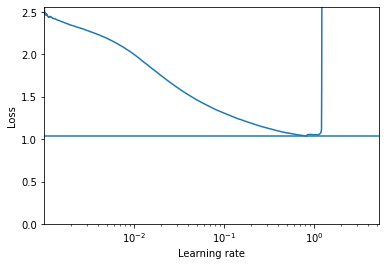

In [39]:
plt.plot(exp_lr.rates, exp_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(exp_lr.losses), min(exp_lr.rates), max(exp_lr.rates))
plt.axis([min(exp_lr.rates), max(exp_lr.rates), 0, exp_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

Loss started jumping up at learning rate about 0.2, therefore we chose learning rate of 0.1

In [44]:
# Training the model with lr=0.1 and using EarlyStopping and ModelCheckpoint to speed up the training process

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-1),
              metrics=['accuracy'])

In [79]:
import os
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [94]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0696 - val_accuracy: 0.9818
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.0683 - val_accuracy: 0.9842
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.0682 - val_accuracy: 0.9858
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 0.0719 - val_accuracy: 0.9850
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9850
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 8.7834e-04 - accuracy: 1.0000 - val_loss: 0.0710 - val_accuracy: 0.9854
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 7.7980e-04 - accuracy: 1.0000 - val_loss: 0.0725 

In [81]:
# Here we reached 100% accuracy for training set and over 98% in validation set

In [91]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 730us/step - loss: 0.0617 - accuracy: 0.9821


[0.0616733655333519, 0.9821000099182129]

In [95]:
# We achieved accuracy of above 98% for test set.